# SyriaTel Communications Project: Customer Churn (Binary Classification)

## Business Understanding

The stakeholder, SyriaTel, is a telecommunications company whose goal is to better understand what factors are causing customer churn. Due to limits on data size (3333 rows of data), the model will only be robust enough to be used by SyriaTel to analyze their specific data provided.


### The Problem

The problem, put forth by SyriaTel, is that they have a customer churn rate in their dataset of nearly 14.5%. An acceptable churn rate is 5-7% annually. Therefore, the true problem to solve with this dataset is to understand the features affecting customer churn, and to what degree. This will empower SyriaTel with the knowledge to lower customer churn by at least 7%.

This is a binary classification problem. 

The reason that customer churn matters is because it is more expensive to find new customers than to retain current customers. Therefore, when considering solutions for this problem, expenses of solutions should be considered. 

### Null Hypothesis

There is no significant differences between the populations of customers who are churning and customers who are not churning. 

### Customer Churn Reduction Strategies:


- Offer Incentives: Regarded as the most effective
- Targeting Correct Audience
- Providing Better Service
- Understanding Complaints and Solving at the Source: 96% of unhappy customers don't complain. 91% of those customers just leave and dont come back. 
- Use your best Sales People on Retention
- Flaunt Competitive Advantages
- Offer Long Term Contracts
- Analyzing Cause of Churn
- Engaging with Customers (Relationship Marketing)
- Customer Education (Training)
- Identify Customer Risk Factors
- Define Most Valuable Customers
- Segment Customers: Customers can be segmented into groups of 
     - Profitablity
     - Readiness to Leave
     - Likelihood to Positively Respond to Offer
     


### Questions to Answer

By exploring typical customer churn and using the CRISP-DM framework, I will seek to answer the following questions: 

1. What features of the dataset are primary determinants of customer churn and to what extent?

2. What are the ways that these findings can be interpreted and how can SyriaTel implement cost-effective solutions?

3. Will these solutions be feasible in reducing the customer churn rate by at least 7%?

### Customer Experience

SyriaTel is a phone provider. Understanding the pain points of the customer experience is essential. Some of the factors that SyriaTel should take into consideration as they approach the findings of the data are:
 - Monthly Costs
 - Network Strength
 - Costs of Contract Initiation
 - Costs of Contract Cancellation
 - SyriaTel Costs v. Competition Costs by Region
 - Any Customer Interaction Via Employees or Ads
 - Obstacles of Internal/External Troubleshooting
 - Transparency for customers in Usage to Cost Relationship
 - Unexpected Charges (Potentially from International Calls without an International Plan)

## Data Understanding

The data has been provided by Kaggle. Details on the units for the account length feature can be pulled from other sources. 

The target will be the churn feature. Other features may be added to the df to better predict churn. 

There is enough data to build a model for SyriaTel to analyze their customer churn at this specific point in time. However, more data would be needed for a more robust model. 

### Importing Relevant Packages

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import itertools
from imblearn.over_sampling import SMOTE, ADASYN
import imblearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, mean_squared_error, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.preprocessing import StandardScaler, scale
from sklearn.pipeline import Pipeline
from scipy.stats import randint
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, auc, confusion_matrix, classification_report, recall_score
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.datasets import make_blobs, make_moons
from sklearn.svm import SVC
from numpy import loadtxt
import shap
from sklearn.naive_bayes import BernoulliNB
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Optional: Avoiding Truncating

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

### Loading Data

In the data, the retained customers were listed as 'False' in the column called 'churn' while the churned customers were listed as 'True'

In [3]:
df = pd.read_csv('data/Kaggle_Customer_Churn_Dataset.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Number of Rows and Columns

In [4]:
df.shape

(3333, 21)

### Number of Elements in Dataframe

In [5]:
df.size

69993

### Churners versus Non-Churners

Some class imbalance is evident with 85% of the churn column being 'False' and 15% of the churn column being 'True'. However, since it is not more imbalanced than a ratio of 10 to 1, SMOTE or another technique to treat class imbalance won't be used.

In [6]:
df.churn.value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

Looking at the column data types, it is evident that area code should not be incorporated as an integer since its value is in location significance rather than the significance of a numerical value. 

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

## Data Assumptions

- All of the data was captured at one point in time.
- The data represents a bill over a one month duration.
- Each row represents a unique phone number. (Confirmed in Data Preparation)
- Each phone number represents one account.
- The company is charging in dollars.
- Account length is in terms of months.
- The location of the customer is in the state listed, not based on the area code.

## Data Preparation

### Viewing the Data

In [8]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Viewing Value Counts for Churn

In [9]:
df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

### Inspecting the Data for NaN Values

No NaN values are present in the data. 

In [10]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

### Observing Column Titles

In [11]:
df.columns

Index(['state', 'account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn'],
      dtype='object')

### Renaming Column Titles to Remove Spaces

In [12]:
df.rename(columns={'account length':'account_length', 'area code': 'area_code', 'phone number': 'phone_number', 'international plan': 'intl_plan', 'voice mail plan': 'vmail_plan', 'number vmail messages': 'qty_vmails', 'total day minutes':'sum_day_mins','total day calls':'sum_day_calls', 'total day charge':'total_day_charge', 'total eve minutes':'sum_eve_mins', 'total eve calls': 'sum_eve_calls', 'total eve charge': 'total_eve_charge', 'total night minutes':'sum_night_mins', 'total night calls':'sum_night_calls', 'total night charge': 'total_night_charge', 'total intl minutes':'sum_intl_mins', 'total intl calls': 'sum_intl_calls', 'total intl charge': 'total_intl_charge', 'customer service calls': 'cust_serv_calls'}, inplace = True)

### Inspecting New Column Titles

In [13]:
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number', 'intl_plan', 'vmail_plan', 'qty_vmails', 'sum_day_mins', 'sum_day_calls',
       'total_day_charge', 'sum_eve_mins', 'sum_eve_calls', 'total_eve_charge', 'sum_night_mins', 'sum_night_calls', 'total_night_charge',
       'sum_intl_mins', 'sum_intl_calls', 'total_intl_charge', 'cust_serv_calls', 'churn'],
      dtype='object')

### Inspecting Column Atributes

In [14]:
df.describe()

,account_length,area_code,qty_vmails,sum_day_mins,sum_day_calls,total_day_charge,sum_eve_mins,sum_eve_calls,total_eve_charge,sum_night_mins,sum_night_calls,total_night_charge,sum_intl_mins,sum_intl_calls,total_intl_charge,cust_serv_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Confirming Uniqueness of Phone Numbers

Each row represents one phone line.

In [15]:
df.phone_number.nunique()


3333

### Looking at Value Counts for Voicemail

The first number is the quantity of voicemails. The second number is the number of people who have that quantity of voicemails. For example, the number of people with zero voicemails is 2411.

In [16]:
df.qty_vmails.value_counts()

0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
35      32
22      32
39      30
37      29
34      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
41      13
16      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
8        2
48       2
50       2
9        2
11       2
49       1
10       1
4        1
51       1
Name: qty_vmails, dtype: int64

### Looking at Value Counts for Account Length

One can assume that the account length is in terms of months. Ultimately this would need to be confirmed with the company.

In [17]:
#Remove Truncation

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 150)

In [18]:
df.account_length.value_counts().sort_index()

1      8
2      1
3      5
4      1
5      1
      ..
221    1
224    2
225    2
232    1
243    1
Name: account_length, Length: 212, dtype: int64

### Average Account Length: 8.5 Years

The average account length is 101 months or roughly 8.5 years. This is likely why the mystery of the reasons behind churn is crucial to discover; Because the average customer is providing immense value with likely low monthly cost. 

In [19]:
df.account_length.describe()

count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: account_length, dtype: float64

### Area Code is Misleading. 

All of the area codes are zoned to California. However, the states listed are assumed to be the true location of the customer. 

In [20]:
df.area_code.value_counts()

415    1655
510     840
408     838
Name: area_code, dtype: int64

In [21]:
df.intl_plan.value_counts()

no     3010
yes     323
Name: intl_plan, dtype: int64

### Dropping the Phone Number and Area Code Feature

In [22]:
df.drop(columns=['phone_number', 'area_code'], inplace = True)

### Replace False and No with Zero

In [23]:
df.replace(False, 0, inplace = True)
df.replace('no', 0, inplace = True)

### Replace True and Yes with One

In [24]:
df.replace(True, 1, inplace = True)
df.replace('yes', 1, inplace = True)

### Dropping the States


State value counts seem pretty even across the board in terms of churned and not churned. 

In [66]:
df.state

AttributeError: 'DataFrame' object has no attribute 'state'

In [26]:
dum_df = pd.get_dummies(df, drop_first = True)
df = dum_df
df.head()

,account_length,intl_plan,vmail_plan,qty_vmails,sum_day_mins,sum_day_calls,total_day_charge,sum_eve_mins,sum_eve_calls,total_eve_charge,sum_night_mins,sum_night_calls,total_night_charge,sum_intl_mins,sum_intl_calls,total_intl_charge,cust_serv_calls,churn,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,...,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Feature Engineering: Monthly Charge

The new feature 'monthly_charge is the sum of the charges within the month.

In [27]:
df['monthly_charge'] = (df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge'] + df['total_intl_charge'])


# Space intentionally left for scrolling.

The average monthly charge is 59.47 while the maximum is 96.15 and the minimum is 22.93.

In [28]:
df.monthly_charge.describe()

count    3333.000000
mean       59.449754
std        10.502261
min        22.930000
25%        52.380000
50%        59.470000
75%        66.480000
max        96.150000
Name: monthly_charge, dtype: float64

### Feature Engineering: Total Charge

The new feature 'total_charge' is the total revenue by customer for the entirety of the relationship of the customer. It was constructed by adding the monthly charges and multiplying by the account length.

In [29]:
df['total_charge'] = (df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge'] + df['total_intl_charge']) * df['account_length']

In [30]:
df.total_charge.describe()

count     3333.000000
mean      6008.885668
std       2627.457674
min         45.420000
25%       4138.880000
50%       5785.700000
75%       7750.260000
max      16966.560000
Name: total_charge, dtype: float64

### Finding Lifetime Total Revenue

The total lifetime revenue from customer charges is roughly $20,000,000.

In [31]:
df.total_charge.sum()

20027615.93

### Finding Revenue of This Month

In [32]:
df.monthly_charge.sum()

198146.03

### Revenue of Cancelled Customers

Revenue of customers who are cancelling.

In [33]:
df_stay = df[['monthly_charge', 'churn']].copy()  

In [34]:
 df_stay = df_stay[df_stay.churn != False]

In [35]:
df_stay.monthly_charge.sum()

31566.93

### Calculating the Percent of Monthly Revenue Lost This Month

Nearly 16 percent of revenue will be gone this month as a result of churn! 

In [36]:
percent_lost = (31566.93 / 198146.03) * 100
percent_lost

15.931144318157674

### Summarization of Class Distribution

1 represents the customers who are cancelling.

In [37]:
df.churn.value_counts()

0.0    2850
1.0     483
Name: churn, dtype: int64

### Depicting Nature of Class Imbalance

df_true represents where customer churn is True.

In [38]:
df_true =  df[df.churn == 1.0]
df_true.shape

(483, 70)

In [39]:
df_false =  df[df.churn == 0.0]
df_false.shape

(2850, 70)

In [40]:
df_true.churn.value_counts() 

1.0    483
Name: churn, dtype: int64

In [41]:
df_false.churn.value_counts()

0.0    2850
Name: churn, dtype: int64

### Scatter Plot of Total Customer Spend Over Time

You can see a line of cancelling customers above the staying ones, indicating higher spend for some cancelling customers.

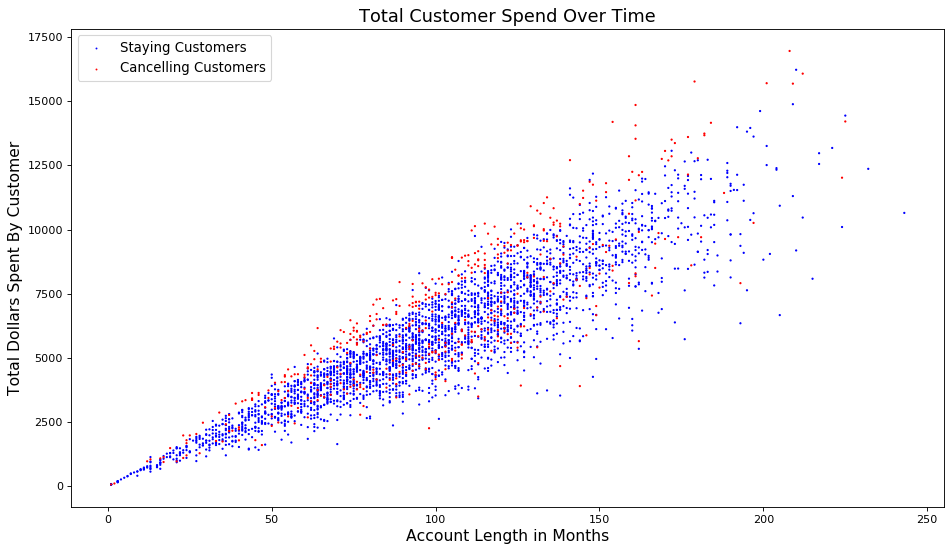

In [42]:
plt.figure(figsize=(12, 7), dpi=80)
plt.scatter(df.account_length, df.total_charge, df.churn == 0, c="blue", label = 'Staying Customers')
plt.scatter(df.account_length, df.total_charge, df.churn == 1, c="red", label = 'Cancelling Customers')
plt.title("Total Customer Spend Over Time", fontsize = 16)
plt.xlabel("Account Length in Months", fontsize = 14)
plt.ylabel("Total Dollars Spent By Customer", fontsize = 14)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc = 'center')
plt.legend(fontsize= 12)
plt.tight_layout()
plt.show()

# Test for Multicollinearity with Variance Inflation Factor (VIF)

Commentary on Multicollinearity. 

In [43]:
# the independent variables set
X = df.drop(columns = 'churn')
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["churn"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

             churn           VIF
0   account_length  1.196525e+02
1        intl_plan  1.137821e+00
2       vmail_plan  1.670922e+01
3       qty_vmails  1.630322e+01
4     sum_day_mins  1.267243e+08
..             ...           ...
64        state_WI  2.289838e+00
65        state_WV  2.767606e+00
66        state_WY  2.324974e+00
67  monthly_charge           inf
68    total_charge  1.228989e+02

[69 rows x 2 columns]


### Removing Columns

The action that the customer took that is measured in terms of charge is most likely the number of minutes. Several other columns are showing high levels of multicolinearity. This is likely because more calls equate to more minutes and also because more minutes means a higher charge.

For this specific business case we should look to the total charge because that is likely the prominent determinant of churn. For that reason, we can eliminate features that include calls and minutes. 


In [44]:
df = df.drop(columns = ['total_charge', 'sum_day_calls', 'vmail_plan', 'account_length', 'sum_day_mins', 'total_day_charge' , 'total_eve_charge','total_night_charge', 'total_intl_charge', 'sum_eve_mins', 'sum_night_mins', 'sum_intl_mins' , 'sum_eve_calls', 'sum_night_calls', 'sum_intl_calls'])


#Intentionally left blank for scrolling

Another test can be run to look for additional multicolinearity.

In [45]:
# the independent variables set
X = df.drop(columns = 'churn')
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["features"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vdf = pd.DataFrame(vif_data)

In [46]:
vdf.head(30)

,features,VIF
0,intl_plan,1.131797
1,qty_vmails,1.356554
2,cust_serv_calls,2.405718
3,state_AL,1.550713
4,state_AR,1.385985
5,state_AZ,1.406548
6,state_CA,1.235984
7,state_CO,1.457992
8,state_CT,1.504426
9,state_DC,1.352551


In [47]:
vdf.tail(30)

,features,VIF
24,state_MI,1.513993
25,state_MN,1.596181
26,state_MO,1.416317
27,state_MS,1.449979
28,state_MT,1.458010
29,state_NC,1.483740
30,state_ND,1.450799
31,state_NE,1.420085
32,state_NH,1.381170
33,state_NJ,1.518769


### Defining X and Y

In [48]:
X = df.drop(columns='churn')
y = df.churn

### Checking the New Class Sizes

In [49]:
y.value_counts()

0.0    2850
1.0     483
Name: churn, dtype: int64

In [50]:
X.shape

(3333, 54)

### Train Test Split

A random state of 42 will be used to stabilize the results. 

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
print('Training Set: ')
print(y_train.value_counts())
print('Normalized:')
print(y_train.value_counts(normalize=True))
print('\n')
# Test set
print('Test Set')
print(y_test.value_counts())
print('Normalized:')
print(y_test.value_counts(normalize=True))

Training Set: 
0.0    2284
1.0     382
Name: churn, dtype: int64
Normalized:
0.0    0.856714
1.0    0.143286
Name: churn, dtype: float64


Test Set
0.0    566
1.0    101
Name: churn, dtype: int64
Normalized:
0.0    0.848576
1.0    0.151424
Name: churn, dtype: float64


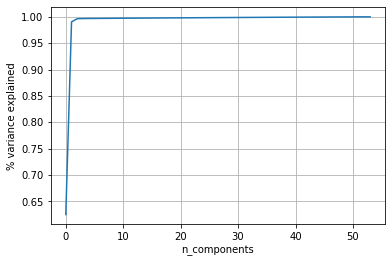

In [53]:
pca = PCA(n_components = X_train.shape[1])
pca_data = pca.fit_transform(X_train)

percent_var_explained = pca.explained_variance_/(np.sum(pca.explained_variance_))
cumm_var_explained = np.cumsum(percent_var_explained)

plt.plot(cumm_var_explained)
plt.grid()
plt.xlabel("n_components")
plt.ylabel("% variance explained")
plt.show()

In [54]:
pca = PCA()
pca_train_data = pca.fit_transform(X_train)
pca_test_data = pca.transform(X_test)

In [55]:
pca_test_data

array([[-7.90497550e+00,  7.32432268e+00, -5.52877458e-01, ...,
        -5.97236654e-03, -8.25943660e-03, -1.51406578e-03],
       [-8.08771211e+00, -1.03208564e+01, -1.62684323e+00, ...,
        -2.76235624e-03, -1.49289449e-02, -3.16251004e-03],
       [-8.36317304e+00, -3.63745509e+01,  2.27014228e+00, ...,
        -4.56270400e-03, -7.20642254e-03, -3.90636942e-03],
       ...,
       [ 1.79527436e+01, -6.45560071e+00, -5.76431478e-01, ...,
        -1.81182653e-02, -8.78262924e-03, -3.37992974e-03],
       [ 1.88918340e+01, -1.21439852e+01,  1.39612061e+00, ...,
         1.63694982e-03, -1.92497173e-03, -2.76751684e-03],
       [-8.06135578e+00, -7.68479784e+00, -6.11159130e-01, ...,
        -1.39831006e-02, -1.12546465e-02, -2.64285562e-03]])

In [56]:
pca_test_data.shape

(667, 54)

In [57]:
df_train_pca = pd.DataFrame(pca_train_data)
df_train_pca["churn"] = y_train

In [63]:
y_train.head()

817     0.0
1373    1.0
679     1.0
56      0.0
1993    0.0
Name: churn, dtype: float64

In [65]:
y_train.shape

(2666,)

In [59]:
df_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,churn
0,-8.143656,-15.478448,0.355207,-0.071490,-0.046367,-0.016172,-0.034373,-0.038091,-0.052896,0.000561,-0.057812,-0.066823,-0.001732,-0.113209,-0.006570,0.044486,0.613908,0.720311,-0.003035,0.161517,0.093979,0.009024,0.059490,0.000890,0.047749,...,-0.002407,0.006051,0.001505,-0.021755,-0.026457,-0.036014,-0.024479,-0.003460,-0.028482,-0.003383,0.007093,-0.012855,-0.020291,0.001366,-0.005416,-0.007891,-0.020952,0.002990,-0.005325,-0.002771,-0.008669,-0.007416,-0.007663,-0.002664,NaN
1,-8.122854,-13.296783,2.366942,-0.070329,-0.032660,-0.008312,-0.014759,-0.002354,-0.023267,0.006451,-0.014415,-0.005695,0.005219,-0.009814,-0.000457,0.009647,0.017183,-0.016412,-0.005129,-0.037208,-0.024952,0.006175,-0.045339,0.007478,-0.020865,...,0.023702,0.026134,0.022326,0.017516,0.051838,0.080920,0.192025,-0.089021,0.340823,0.842047,-0.132917,-0.173533,-0.138339,-0.003110,-0.073331,-0.014750,-0.058617,0.006849,-0.019952,-0.007285,-0.010430,-0.014497,-0.011089,-0.002781,0.0
2,-7.792986,18.025134,-0.514488,0.864928,-0.014628,-0.017048,-0.019339,-0.055562,-0.052006,-0.009071,-0.086197,-0.118766,-0.038064,-0.270708,0.739668,-0.390226,-0.343635,0.174976,0.004158,0.119655,0.062362,-0.001758,0.069724,-0.008047,0.037066,...,-0.024259,-0.012248,-0.013082,-0.014852,-0.022193,-0.019272,-0.029394,0.013057,0.008180,0.010421,-0.001973,-0.017380,-0.033548,-0.002491,-0.053785,0.012053,-0.022171,0.006983,-0.013244,0.007636,0.012427,-0.023623,-0.011118,-0.000917,0.0
3,-8.126404,-13.924534,-0.634285,-0.079841,-0.044048,-0.015482,-0.029550,-0.030155,-0.046595,0.002904,-0.045169,-0.042477,0.000542,-0.061033,-0.000696,0.020538,0.173538,-0.350097,0.760837,0.431200,0.166035,0.009295,0.099611,-0.001335,0.031948,...,-0.004896,-0.009001,0.008217,-0.017934,-0.028223,-0.028648,-0.029965,0.002980,-0.026971,-0.002834,0.001373,-0.012209,-0.028402,0.001072,-0.012916,0.003656,-0.021417,0.003918,0.007064,-0.007636,-0.011391,-0.014215,-0.009961,-0.002741,0.0
4,-7.865922,10.968467,-1.534403,-0.134435,-0.019810,-0.020245,-0.015531,-0.027076,-0.026130,-0.014935,-0.016289,-0.026948,-0.009709,-0.006968,0.003544,-0.000253,0.040908,-0.042918,-0.000740,-0.073782,-0.047682,-0.033500,-0.102121,-0.002676,-0.078230,...,-0.312918,-0.256166,0.690379,-0.155585,-0.124963,-0.093593,-0.074383,0.008442,-0.053553,-0.003210,0.000728,-0.028427,-0.048856,0.002216,-0.027043,0.006728,-0.029926,0.004889,0.011551,-0.014965,-0.013384,-0.019770,-0.013004,-0.001909,0.0


In [60]:
df_train_pca.shape

(2666, 55)

### Dropping NaN Values

In [61]:
df_train_pca.isna().sum()

0          0
1          0
2          0
3          0
4          0
        ... 
50         0
51         0
52         0
53         0
churn    542
Length: 55, dtype: int64

### Retesting for Colinearity with VIF

In [58]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["features"] = df_train_pca.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_train_pca.values, i)
                          for i in range(len(df_train_pca.columns))]
  
vdf = pd.DataFrame(vif_data)

MissingDataError: exog contains inf or nans

In [97]:
vdf.head(30)

,features,VIF
0,intl_plan,1.139738
1,qty_vmails,1.351896
2,cust_serv_calls,2.387984
3,state_AL,1.515734
4,state_AR,1.370449
5,state_AZ,1.419210
6,state_CA,1.233217
7,state_CO,1.497030
8,state_CT,1.502568
9,state_DC,1.330648


In [98]:
vdf.tail(30)

,features,VIF
24,state_MI,1.529471
25,state_MN,1.624147
26,state_MO,1.421950
27,state_MS,1.396176
28,state_MT,1.460698
29,state_NC,1.487057
30,state_ND,1.450333
31,state_NE,1.354053
32,state_NH,1.353168
33,state_NJ,1.515882


### Seeking a Model to Maximize Recall:

Having a false negative (Type II Error), would mean that the model is predicting that the customer is not going to cancel when they actually are. For this reason, priority is given to the metric of recall.

### Logistic Regression Model

Here, a ROC Curve can be used to show the performance of a classification model at all classification thresholds. This curve plots two parameters: true positive rate and false positive rate. 

Area Under the ROC Curve (AUC): An aggregated metric that evaluates how well a logistic regression model classifies positive and negative outcomes at all possible cutoffs. It can range from 0.5 to 1, and the larger it is the better.

The AUC of .79 indicates that this model is sorting the values at an acceptable way, but not an excellent way.

AUC: 0.6119896441941013


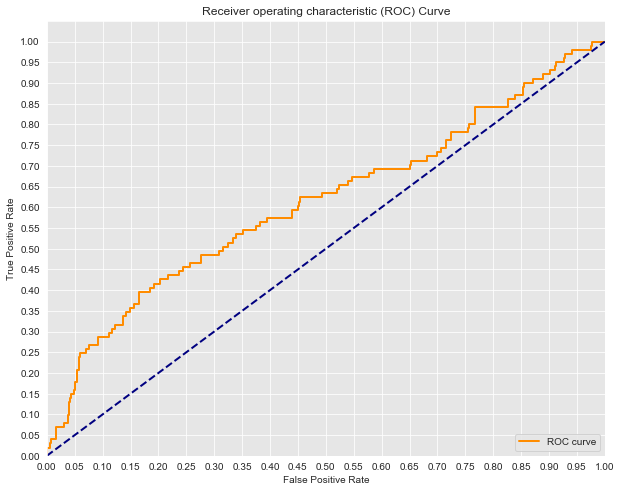

In [54]:
# Initial Model #what does the solver indicate?
logreg = LogisticRegression(fit_intercept=False, solver='liblinear')

# Probability scores for test set
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

# False positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Print AUC

print('AUC: {}'.format(auc(fpr, tpr)))

# Plot the ROC curve
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color = 'darkorange',
         lw=lw, label='ROC curve')
plt.plot([0,1], [0,1], color = 'navy', lw=lw, linestyle ='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [55]:
y_pred = logreg.predict(X_test)

### Logistic Regression Evaluation

In [56]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[549,  17],
       [ 93,   8]])

### Confusion Matrix Breakdown:
 - 553 True Negatives: Predicting that they will not cancel and being correct.
 - 13 False Positives: Predicting that they will cancel and being wrong. 
 - 86 False Negatives: Predicting that they're not going to cancel and being wrong.
 - 15 True Positive: Predicting that they will cancel and being correct.

### Recall Calculation: Avoiding the worst scenario.

In the case of this project, a Type II Error would be worse than a Type I Error. A Type II Error would indicate a false negative, meaning that SyriaTel would predict that their customer would not churn, and they would be incorrect. This is much worse than a Type I Error or a false positive where SyriaTel predicts that the customer would churn and they do not. 

Since a Type II Error is a worse scenario when it comes to the business application of the findings, which means recall is the ideal metric to optimize for. Recall here is measuring how good the model is at predictin the cancellations.

.14 for recall is low so other models should be utilized.

In [57]:
recall_score(y_test, y_pred)

0.07920792079207921

# K-Nearest Neighbors Model

In [58]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
test_preds = clf.predict(X_test)

In [59]:
# Complete the function
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.967741935483871
Recall Score: 0.594059405940594
Accuracy Score: 0.9355322338830585
F1 Score: 0.7361963190184048


Optimizing the model for the best value of K.

In [60]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        recall = recall_score(y_test, preds)
        if recall > best_score:
            best_k = k
            best_score = recall
    
    print("Best Value for k: {}".format(best_k))
    print("Recall: {}".format(best_score))

# K-Nearest Neighbors Evaluation

Before optimizing for the value of K, logistic regression was the superior model, but now KNN has a better recall.

In [61]:
find_best_k(X_train, y_train, X_test, y_test)

Best Value for k: 1
Recall: 0.6336633663366337


# Decision Tree Model

In [62]:
SEED = 1

In [63]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

Here we have a fairly high AUC. 

In [64]:
# Make predictions using test set 
y_pred = dt.predict(X_test)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8373683658118463

Here we have a fairly high AUC and recall.

In [65]:
recall_score(y_test, y_pred)

0.7524752475247525

# Descision Tree Experimentation with Default Settings

The Decision Tree Model did not perform well with the Default Settings. 

In [66]:
dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=6,
                           max_depth=3,
                           min_samples_split=0.7,
                           min_samples_leaf=0.25, 
                           random_state= SEED)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5

In [67]:
print('Recall: ', recall_score(y_test, y_pred))

Recall:  0.0


# Tuning the Decision Tree Model

Train AUC, and Test AUC will be indicative of training and test error for learning.

### Identifying Ideal Maximum Tree Depth

6 is the ideal maximum tree depth. Greater tree depth is indicative of overfitting as Train AUC soars above Test AUC. At 8, the Test AUC is above the Train AUC.

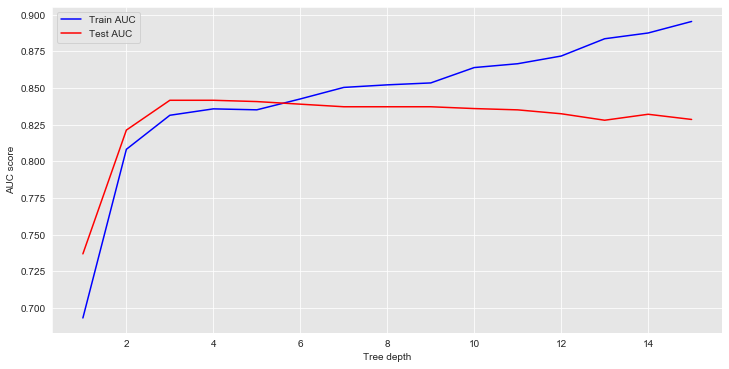

In [68]:
# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 15, 15, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=SEED)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()


### Identifying Ideal Minimum Sample Split

.2 would be the ideal number for sample split. Larger split does not improve learning. 

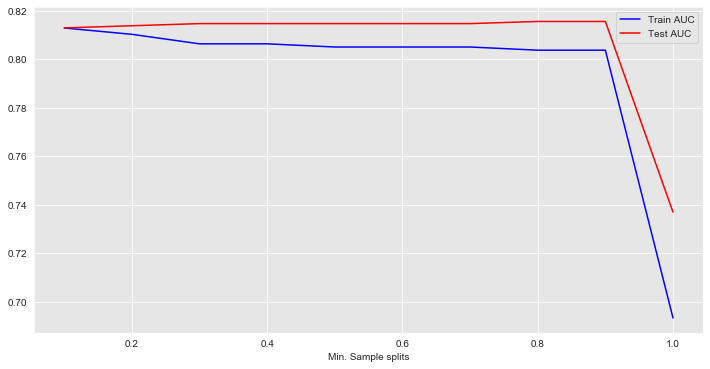

In [69]:
# Identify the optimal min-samples-split for given data
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, random_state=SEED)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

### Identifying Ideal Minimum Sample Leafs

AUC for Training and test are best at .07 as greater values cause them to separate. 

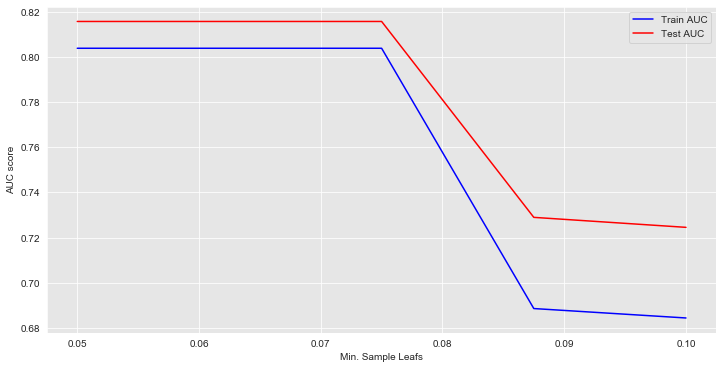

In [70]:
# Calculate the optimal value for minimum sample leafs
min_samples_leafs = np.linspace(0.05, .1, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=SEED)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

### Identifying Ideal Maximum Features

Best fit number is 52.

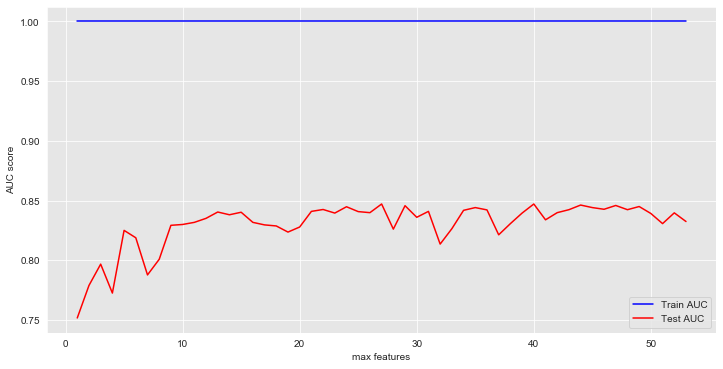

In [71]:
# Find the best value for optimal maximum feature size
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=SEED)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

### Retraining the Classifier with Optimal Values

These values will allow the model to incorporate the maximum amount of positive learning possible.

In [72]:
dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=52,
                           max_depth=6,
                           min_samples_split=0.2,
                           min_samples_leaf=0.07, 
                           random_state=SEED)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8156159255501522

Recall of .69 is not as great as the initial decision tree. 

In [73]:
recall_score(y_test, y_pred) 

0.693069306930693

In [74]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[531  35]
 [ 31  70]]
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       566
         1.0       0.67      0.69      0.68       101

    accuracy                           0.90       667
   macro avg       0.81      0.82      0.81       667
weighted avg       0.90      0.90      0.90       667



In [75]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, y_pred) * 100))

Testing Accuracy for Decision Tree Classifier: 90.1%


In [76]:
dt.feature_importances_

array([0.22747284, 0.        , 0.28567297, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.48685419])

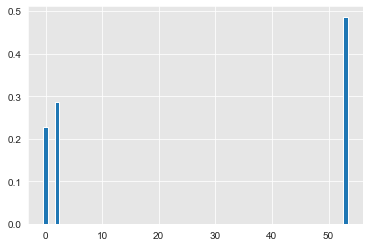

In [77]:
plt.bar(range(len(dt.feature_importances_)), dt.feature_importances_)
plt.show()

# Bagging Trees + Decision Tree Model with Gini Impurity

The bagging classifier is used to reduce variance in the dataset. Decision trees have low bias but high variance which can lead to overfitting and drastic output changes when minute input changes are made.

In [78]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=4), 
                                 n_estimators=20, random_state = SEED)

In [79]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                  n_estimators=20, random_state=1)

In [80]:
# Returns the mean accuracy of training set
bagged_tree.score(X_train, y_train)


0.9508627156789198

In [81]:
# Returns the mean accuracy of testing set
bagged_tree.score(X_test, y_test)

0.952023988005997

In [82]:
y_pred = bagged_tree.predict(X_test)

### Bagging increased recall.

In [83]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[566   0]
 [ 32  69]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       566
         1.0       1.00      0.68      0.81       101

    accuracy                           0.95       667
   macro avg       0.97      0.84      0.89       667
weighted avg       0.95      0.95      0.95       667



In [84]:
recall_score(y_test, y_pred)

0.6831683168316832

### Optimizing for Entropy

In [85]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=4), 
                                 n_estimators=20, random_state = SEED)

In [86]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=4),
                  n_estimators=20, random_state=1)

In [87]:
bagged_tree.score(X_train, y_train)


0.9523630907726932

In [88]:
bagged_tree.score(X_test, y_test)

0.952023988005997

In [89]:
y_pred = bagged_tree.predict(X_test)

### Optimizing for entropy made no difference.

In [90]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[566   0]
 [ 32  69]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       566
         1.0       1.00      0.68      0.81       101

    accuracy                           0.95       667
   macro avg       0.97      0.84      0.89       667
weighted avg       0.95      0.95      0.95       667



In [91]:
recall_score(y_test, y_pred)

0.6831683168316832

### Optimizing for Max Depth

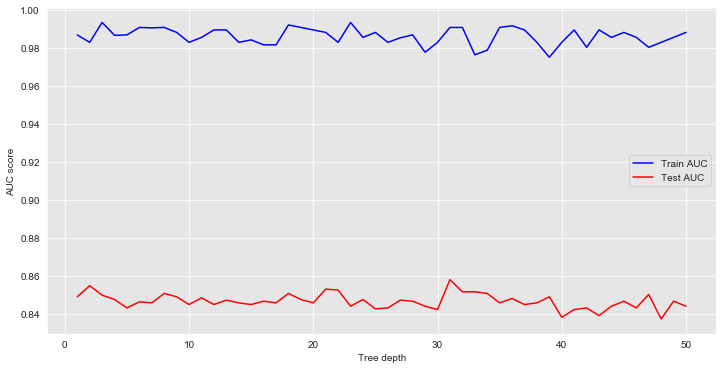

In [92]:
# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 50, 50, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', random_state = SEED), n_estimators=20)   
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

### Optimised at 5; Greater max depth would cause overfitting.

In [93]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth= 5), 
                                 n_estimators=20, random_state = SEED)

In [94]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5),
                  n_estimators=20, random_state=1)

In [95]:
bagged_tree.score(X_train, y_train)


0.95423855963991

In [96]:
bagged_tree.score(X_test, y_test)

0.952023988005997

In [97]:
y_pred = bagged_tree.predict(X_test)

### Optimizing for max depth increased recall.

In [98]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[566   0]
 [ 32  69]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       566
         1.0       1.00      0.68      0.81       101

    accuracy                           0.95       667
   macro avg       0.97      0.84      0.89       667
weighted avg       0.95      0.95      0.95       667



In [99]:
recall_score(y_test, y_pred)

0.6831683168316832

# Gradient Boost Model

Gradient Boost uses the next possible best model combined with previous models to minimize the overall prediction error. The prediction error in this classification model measures how well the model predicts the variable of a customer churning.

In [100]:
gbt_clf = GradientBoostingClassifier(random_state=SEED)

In [101]:
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [102]:
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

### Training Scores

In [103]:
print_metrics(y_train, gbt_clf_train_preds)

Precision Score: 0.9930555555555556
Recall Score: 0.7486910994764397
Accuracy Score: 0.9632408102025506
F1 Score: 0.853731343283582


### Testing Scores

In [104]:
print_metrics(y_test, gbt_clf_test_preds)

Precision Score: 0.8974358974358975
Recall Score: 0.693069306930693
Accuracy Score: 0.9415292353823088
F1 Score: 0.7821229050279329


In [105]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       566
         1.0       0.90      0.69      0.78       101

    accuracy                           0.94       667
   macro avg       0.92      0.84      0.87       667
weighted avg       0.94      0.94      0.94       667



In [106]:
recall_score(y_test, y_pred)

0.6831683168316832

# Adaboost Model

Adaboost or Adaptive Boosting is 

In [107]:
adaboost_clf = AdaBoostClassifier(random_state= SEED)

In [108]:
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

In [109]:
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

### Training Scores

In [110]:
print_metrics(y_train, adaboost_train_preds)

Precision Score: 0.8028673835125448
Recall Score: 0.5863874345549738
Accuracy Score: 0.9201050262565641
F1 Score: 0.6777609682299546


### Testing Scores

In [111]:
print_metrics(y_test, adaboost_test_preds)

Precision Score: 0.7808219178082192
Recall Score: 0.5643564356435643
Accuracy Score: 0.9100449775112444
F1 Score: 0.6551724137931033


In [112]:
recall_score(y_test, y_pred)

0.6831683168316832

# Random Forest Model

The random forest model 

In [113]:
forest = RandomForestClassifier(n_estimators=20, max_depth= 11, random_state = SEED)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, n_estimators=20, random_state=1)

In [114]:
y_pred = forest.predict(X_test)

In [115]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[566   0]
 [ 36  65]]
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       566
         1.0       1.00      0.64      0.78       101

    accuracy                           0.95       667
   macro avg       0.97      0.82      0.88       667
weighted avg       0.95      0.95      0.94       667



In [116]:
forest.score(X_train, y_train)

0.9549887471867967

In [117]:
forest.score(X_test, y_test)

0.9460269865067467

In [118]:
recall_score(y_test, y_pred)

0.6435643564356436

# XGBoost Model

In [119]:
xg = XGBClassifier(random_state = SEED)

xg.fit(X_train, y_train)

training_preds = xg.predict(X_train)
test_preds = xg.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
train_recall = recall_score(y_train, training_preds)
test_recall = recall_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print('Training Recall: {:.4}%'.format(train_recall * 100))
print('Test Recall: {:.4}%'.format(test_recall * 100))

Training Accuracy: 95.54%
Validation accuracy: 95.2%
Training Recall: 69.11%
Test Recall: 68.32%


# Tuning XGBoost Model with GridSearchCV

In [120]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [121]:
grid_xg = GridSearchCV(xg, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_xg.fit(X_train, y_train)

best_parameters = grid_xg.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_xg.predict(X_train)
test_preds = grid_xg.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
train_recall = recall_score(y_train, training_preds)
test_recall = recall_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print('Training Recall: {:.4}%'.format(train_recall * 100))
print('Test Recall: {:.4}%'.format(test_recall * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.2
max_depth: 6
min_child_weight: 1
n_estimators: 100
subsample: 0.7

Training Accuracy: 97.97%
Validation accuracy: 94.3%
Training Recall: 86.39%
Test Recall: 72.28%


# XGBoost with Optimal Parameters

### The Optimal Parameters Increased

In [122]:
xg = XGBClassifier(max_depth = 6, learning_rate = .1, n_estimators = 100, min_child_weight = 1, subsample = .7, random_state = SEED)

xg.fit(X_train, y_train)

training_preds = xg.predict(X_train)
test_preds = xg.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
train_recall = recall_score(y_train, training_preds)
test_recall = recall_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print('Training Recall: {:.4}%'.format(train_recall * 100))
print('Test Recall: {:.4}%'.format(test_recall * 100))

Training Accuracy: 97.04%
Validation accuracy: 94.3%
Training Recall: 80.1%
Test Recall: 70.3%


In [123]:
xg.feature_importances_

array([0.1011318 , 0.05769295, 0.06045222, 0.01649514, 0.        ,
       0.        , 0.00934423, 0.01883993, 0.02764657, 0.02101796,
       0.01631995, 0.01692746, 0.01874411, 0.        , 0.        ,
       0.01703967, 0.01593195, 0.        , 0.02648925, 0.        ,
       0.0209567 , 0.03871247, 0.02241225, 0.02528833, 0.02497793,
       0.01317636, 0.01803456, 0.01699197, 0.01973186, 0.02427277,
       0.02356611, 0.01581483, 0.        , 0.03290255, 0.        ,
       0.02761347, 0.        , 0.01899934, 0.        , 0.        ,
       0.01403145, 0.02281477, 0.0200603 , 0.        , 0.01799338,
       0.021579  , 0.        , 0.        , 0.0167033 , 0.        ,
       0.02032737, 0.01928793, 0.01621226, 0.06346561], dtype=float32)

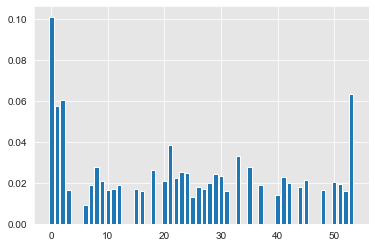

In [124]:
plt.bar(range(len(xg.feature_importances_)), xg.feature_importances_)
plt.show()

# Bernoulli Naive Bayes  

This model relies on Bayes theorum and addresses independent binary outcomes. 

In [125]:
clf = BernoulliNB()
clf.fit(X_train, y_train)
training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
train_recall = recall_score(y_train, training_preds)
test_recall = recall_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print('Training Recall: {:.4}%'.format(train_recall * 100))
print('Test Recall: {:.4}%'.format(test_recall * 100))

Training Accuracy: 86.31%
Validation accuracy: 84.71%
Training Recall: 10.21%
Test Recall: 9.901%


# Support Vector Machine

### Importance of Features From the XGBoost Model

Features can be eliminated through tuning. 

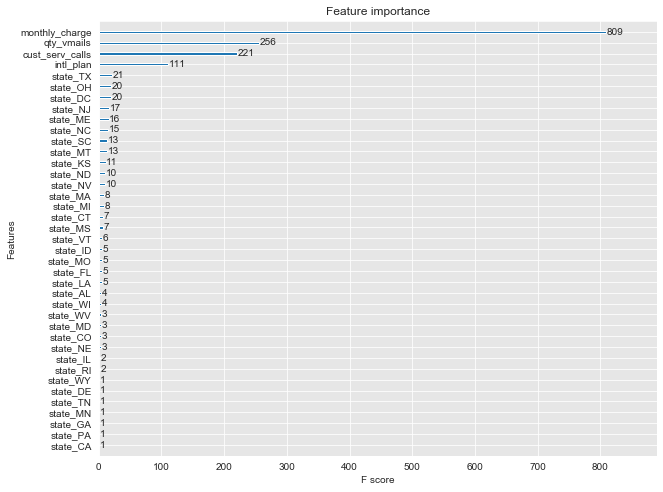

In [126]:
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xg, ax=ax)

### Top Features to Include in Tuning

- Monthly Charge
- Sum of International Minutes
- Total Charge
- Area Code
- Sum of Evening Minutes
- Sum of Night Minutes
- Sum of Night Calls
- Sum of Day Calls
- Sum of Day Minutes
- Customer Service Calls
- Sum of International Calls
- Sum of Evening Calls

### Tuning with Only top 12 Important Features

In [121]:
df.head()

,account_length,intl_plan,vmail_plan,qty_vmails,sum_day_mins,sum_day_calls,total_day_charge,sum_eve_mins,sum_eve_calls,total_eve_charge,sum_night_mins,sum_night_calls,total_night_charge,sum_intl_mins,sum_intl_calls,total_intl_charge,cust_serv_calls,churn,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,...,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,monthly_charge,total_charge
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75.56,9671.68
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59.24,6338.68
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,62.29,8533.73
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,66.80,5611.20
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52.09,3906.75


In [144]:
im_df = df[['monthly_charge', 'sum_intl_mins', 'total_charge', 'sum_eve_mins', 'sum_night_mins', 'sum_night_calls', 'sum_day_calls', 'sum_day_mins', 'cust_serv_calls', 'sum_intl_calls', 'sum_eve_calls', 'churn']]

In [145]:
im_df.head()

,monthly_charge,sum_intl_mins,total_charge,sum_eve_mins,sum_night_mins,sum_night_calls,sum_day_calls,sum_day_mins,cust_serv_calls,sum_intl_calls,sum_eve_calls,churn
0,75.56,10.0,9671.68,197.4,244.7,91,110,265.1,1,3,99,0.0
1,59.24,13.7,6338.68,195.5,254.4,103,123,161.6,1,3,103,0.0
2,62.29,12.2,8533.73,121.2,162.6,104,114,243.4,0,5,110,0.0
3,66.80,6.6,5611.20,61.9,196.9,89,71,299.4,2,7,88,0.0
4,52.09,10.1,3906.75,148.3,186.9,121,113,166.7,3,3,122,0.0


In [146]:
X = im_df.drop(columns = 'churn')
y = im_df.churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost with Top Feature Selection

In [147]:
xg = XGBClassifier(random_state = SEED)

xg.fit(X_train, y_train)

training_preds = xg.predict(X_train)
test_preds = xg.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
train_recall = recall_score(y_train, training_preds)
test_recall = recall_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print('Training Recall: {:.4}%'.format(train_recall * 100))
print('Test Recall: {:.4}%'.format(test_recall * 100))

Training Accuracy: 94.0%
Validation accuracy: 93.25%
Training Recall: 66.49%
Test Recall: 66.34%


# XGBoost with Top Feature Selection and GridSearchCV

In [148]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [149]:
grid_xg = GridSearchCV(xg, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_xg.fit(X_train, y_train)

best_parameters = grid_xg.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_xg.predict(X_train)
test_preds = grid_xg.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
train_recall = recall_score(y_train, training_preds)
test_recall = recall_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print('Training Recall: {:.4}%'.format(train_recall * 100))
print('Test Recall: {:.4}%'.format(test_recall * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 1
n_estimators: 100
subsample: 0.5

Training Accuracy: 97.86%
Validation accuracy: 92.5%
Training Recall: 85.08%
Test Recall: 62.38%


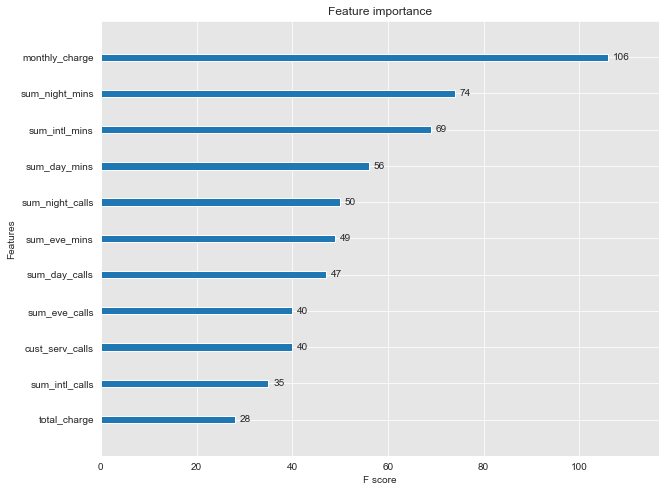

In [150]:
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xg, ax=ax)

In [151]:
im_df.head()

,monthly_charge,sum_intl_mins,total_charge,sum_eve_mins,sum_night_mins,sum_night_calls,sum_day_calls,sum_day_mins,cust_serv_calls,sum_intl_calls,sum_eve_calls,churn
0,75.56,10.0,9671.68,197.4,244.7,91,110,265.1,1,3,99,0.0
1,59.24,13.7,6338.68,195.5,254.4,103,123,161.6,1,3,103,0.0
2,62.29,12.2,8533.73,121.2,162.6,104,114,243.4,0,5,110,0.0
3,66.80,6.6,5611.20,61.9,196.9,89,71,299.4,2,7,88,0.0
4,52.09,10.1,3906.75,148.3,186.9,121,113,166.7,3,3,122,0.0


# Computing Importance with SHAP (SHapley Additive exPlanations) Values

In [152]:
X_display,y_display = shap.datasets.nhanesi(display=True)

In [153]:
explainer = shap.TreeExplainer(xg)
shap_values = explainer.shap_values(X_test)

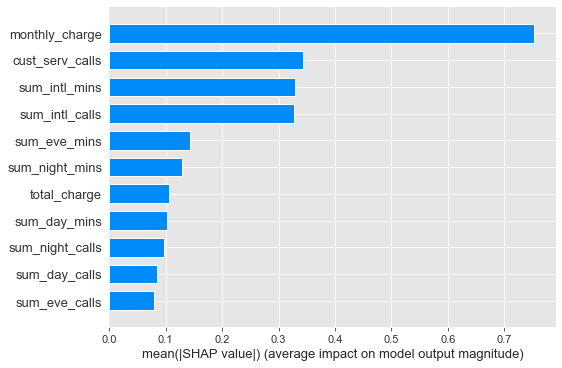

In [154]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

### Initiating Javascript

In [155]:
shap.initjs()

### Features Contributing to Pushing Model Output

The graph below shows features each contributing to push the model output from the base value to the model output. Features pushing the prediction higher are shown in red. Those pushing the prediction lower are in blue. The number associated with the feature shows the balue that is impacting churn.

In [156]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [157]:
X.shape

(3333, 11)

### Reading the SHAP Value Summary Plot

On the right hand side of the graph, the legend for feature value indicates that red is high feature value and blue is low feature value. On the y axis, the features are divided individually. The x axis at the bottom ranks how significant the impact is. Summarizing, blue on the far right of a feature would indicate that low feature value has a high impact of churn, while red would indicate that high feature value has a high impact of churn. 

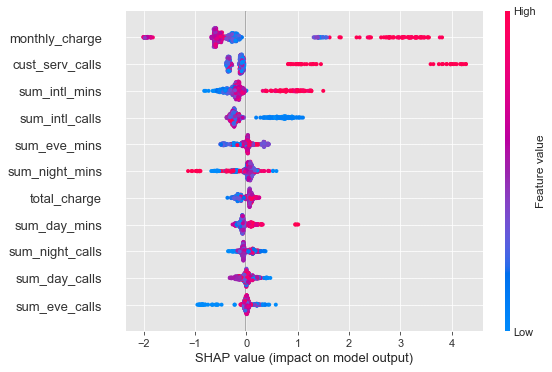

In [158]:
shap.summary_plot(shap_values, X_test, title = 'SHAP Values by Feature')

### Observing Features by SHAP Values

### Contributors of High Customer Churn: Value of One

- High Monthly Charge
- High Number of Customer Service Calls
- High Number of International Minutes: Perhaps international minutes are priced high.

### Contributors of Low Customer Churn: Value of Zero

- Low Number of Evening Calls
- Low International Minutes
- High Number of Night Minutes: Perhaps they're priced competitively for night minutes.
- High number of International Calls

### Future 

In [159]:
WHAT DID COMPETEIPON LOOK LIKE

SyntaxError: invalid syntax (<ipython-input-159-6c0e596e8df4>, line 1)

### Negative Predictive Value Calculation (NPV): How good the model is at predicting retained customers.